Dit notebook bevat het stappenplan en de opdachten.

## Stappenplan met de Titanic dataset

<img src="https://images3.persgroep.net/rcs/POtrmPmC1K03iPjBP9AeArEhEwo/diocontent/57259129/_crop/0/166/1502/849/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8">

In dit stappenplan analyseren we de Titanic dataset. De dataset bevat informatie over de passagiers van de Titanic. De dataset bevat 12 verschillende kolommen.

* PassengerId(Id van de passagier)
* Survived(Overleefd(1), Niet overleefd(0))
* Pclass(De passagiersklasse)
* Name(Naam van de passagier)
* Sex(Geslacht van de passagier)
* Age(Leeftijd van de passagier)
* SibSp(Aantal broers / zussen / echtgenoten aan boord)
* Parch(Aantal ouders / kinderen aan boord)
* Ticket(Ticket nummer)
* Fare(De kosten voor de ticket)
* Cabin(code van de cabine)
* Embarked(Haven waar ze zijn ingestapt)

<b>Opdracht: </b> onderzoek welke variabelen correlatie vormen op de overlevingskans van een passagier. 


## Data inladen

<div class="alert-info alert" role="alert-info">  
Stap 1. Importeren van de libraries
</div>

In de volgende kernel worden 3 verschillende libraries ingeladen. 

* <b>Pandas library:</b> is een software pakket dat wordt gebruikt voor data manipulatie en data analyse. Met de  pandas library is het mogeijk om je data op te slaan in verschillende data structuren. Dit kan gedaan worden met behulp van een dataframe object of met een series object.
* <b>Matplotlib library:</b> is een software pakket voor het visualiseren van data
* <b>Seaborn library:</b> is net als matplotlib een software pakket voor het visualiseren van data. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert-info alert" role="alert-info">  
Stap 2. Inlezen van de data.
</div>

In deze stap wordt het CSV bestand ingeladen. De data komt van mijn github repository. De data wordt ingeladen als csv bestand en daarna getransformeerd naar een dataframe. Met het stukje code <b>df.head()</b> toon ik de eerste 5 records uit de dataframe.

In [2]:
location = r"https://raw.githubusercontent.com/jochem1999/Datasets/master/titanic_data.csv"

In [3]:
df_titanic = pd.read_csv(location) 
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert-info alert" role="alert-info">  
Stap 3. Exploratory data Analysis.
</div>

In deze stap controleer ik de kwaliteit van de data en zoek ik naar correlaties in de data.

Met de <b>df.shape</b> commando verkrijg je informatie over de grote van de dataframe. De dataframe bevat 891 rijen en 12 kolommen.

In [4]:
df_titanic.shape

(891, 12)

Met de <b>isna().sum()</b> commando controleer ik of de dataframe lege waardes bevat. De kolom Age bevat 177 lege waardes, de Cabin kolom bevat 687 lege waardes en de Embarked kolom bevat 2 lege waardes. 

In [5]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Met de <b>dtypes</b> commando kan je per kolom de data type zien.

In [6]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

De staafdiagram weergeeft het aantal mannen en vrouwen op de Titanic.

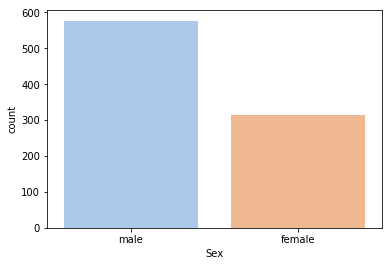

In [7]:
sns.countplot(x="Sex",data=df_titanic, palette="pastel")

Met de map commando verander ik alle waardes met een bepaalde waarde naar een nieuwe nieuwe waarde. De waarde male verander ik naar 0 en de waarde female naar 1. Vervolgens zet ik deze waardes in een nieuwe kolom. De reden dat ik de waardes map is omdat de correlatie matrix geen correlatie kan vinden met categorisch waardes.  

In [8]:
df_titanic['SexEncoded'] = df_titanic['Sex'].map({'male': 0 ,'female': 1})

Hieronder staat een correlatie matrix. Een correlatie matrix wordt gebruikt om de correlaties te vinden. De cijfers in de cellen geven aan hoeveel correlatie tussen de kolommen is. Bij een waarde van 0 is er geen correlatie. Hoe dichter de waarde bij 1 of -1 des te meer correlatie er is. Zoals je kan zien heeft de dataset  niet heel veel correlatie. Als we kijken naar de Survived kolom dan correleert deze kolom het meest met de kolommen Pclass, Fare en Sex.  

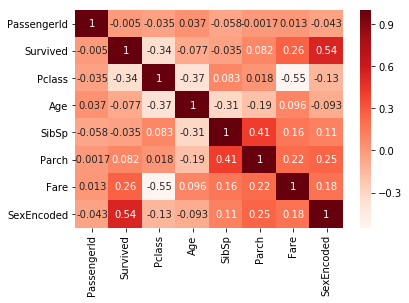

In [9]:
cor = df_titanic.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

De grafiek laat zien dat meer vrouwen dan mannen de Titanic hebben overleefd.

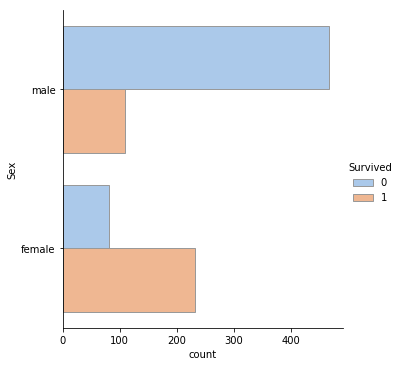

In [10]:
sns.catplot(y="Sex", hue="Survived", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_titanic);

De volgende grafiek laat zien dat mensen bij de 1e klas meer kans hadden op overleven dan bij de 3e klas.

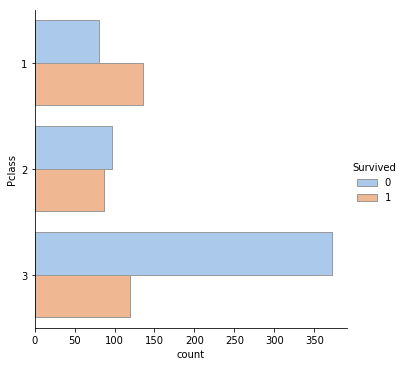

In [11]:
sns.catplot(y="Pclass", hue="Survived", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_titanic);

Hieronder staat een boxplot beschreven. In de boxplot hieronder kan je afleiden dat mensen die het overleefd hebben relatief duurdere tickets hebben. 


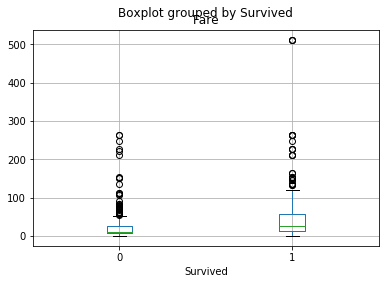

In [12]:
df_titanic.boxplot(column='Fare', by='Survived');

<div class="alert-info alert" role="alert-info">  
Stap 4. Resultaten.
</div>

* Op de titanic zijn relatief meer mannen dan vrouwen overleden.
* Mensen uit een hogere klas hebben een hogere overlevings kans.
* Mensen met een duurdere ticket hebben meer kans op overleven.

# Opdrachten Iris Dataset 


<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

Voor deze opdrachten ga je werken met de Iris dataset. De dataset bevat informatie over de verschillende soorten van de iris bloem. De dataset bevat 5 verschillende kolommen.

* sepal_length
* sepal_width
* petal_length
* petal_width
* species(soort bloem)

<b>Opdracht: </b> onderzoek of er correlatie gevonden kan worden in de dataset in relatie met de soorten bloemen. 

<div class="alert alert-info" role="info">
  Opdracht 1. Importeer de dataset en laat de eerste 5 rijen uit de dataset zien.
</div>

De locatie van de dataset: https://raw.githubusercontent.com/jochem1999/Datasets/master/IRIS.csv

In [13]:
## Uitwerking opdracht 1.
df = pd.read_csv("https://raw.githubusercontent.com/jochem1999/Datasets/master/IRIS.csv") 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<div class="alert alert-info" role="info">
  Opdracht 2. Hoeveel kolommen bevat de Iris dataset?
</div>

In [14]:
## Uitwerking opdracht 2
df.shape

(150, 5)

<div class="alert alert-info" role="info">
  Opdracht 3. Bevat de dataset lege velden?
</div>

In [15]:
## Uitwerkingen opdracht 3
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<div class="alert alert-info" role="info">
  Opdracht 4. Welke datatypes bevat de dataset?
</div>

In [16]:
## Uitwerkingen opdracht 4.
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<div class="alert alert-info" role="info">
  Opdracht 5. Maak een staafdiagram met op x-as de soorten bloemen en op de y-as het aantal waarnemingen.
</div>

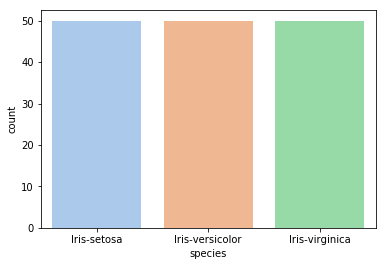

In [17]:
## Uitwerkingen opdracht 5
sns.countplot(x="species",data=df, palette="pastel")

<div class="alert alert-info" role="info">
  Opdracht 6. Verandere de Iris-setosa naar 0, de Iris-versicolor naar 1 en de Iris-virginica naar 2. Sla de nieuwe waardes op in een nieuwe kolom genaamd <b>'species_encoded'</b>.
</div>

In [18]:
## Uitwerkingen opdracht 6
df['species_encoded'] = df['species'].map({'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2})

<div class="alert alert-info" role="info">
  Opdracht 7. Welke kolommen correleren het meest met de species_encoded kolom?
</div>

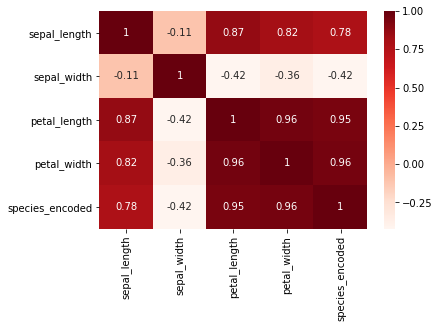

In [19]:
# Uitwerkingen Opdracht 7

cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

<div class="alert alert-info" role="info">
  Opdracht 8. Maak van de 2 beste correlerende kolommen een boxplot en zet deze uit tegen de species kolom. 
</div>

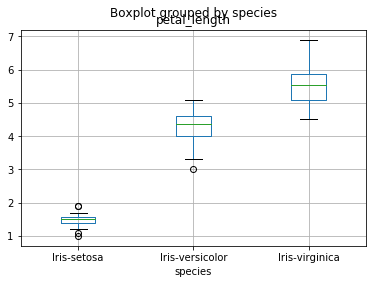

In [20]:
df.boxplot(column='petal_length', by='species');

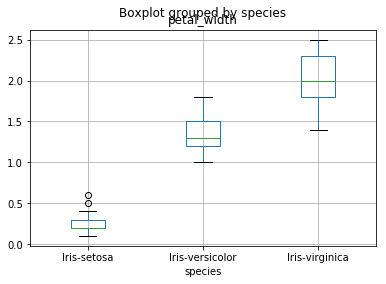

In [21]:
df.boxplot(column='petal_width', by='species');

<div class="alert alert-info" role="info">
  Opdracht 9. Maak een scatterplot vand de belangrijkste features.
</div>

Informatie over hoe je een scatterplot kan maken kan je hier vinden https://seaborn.pydata.org/generated/seaborn.scatterplot.html

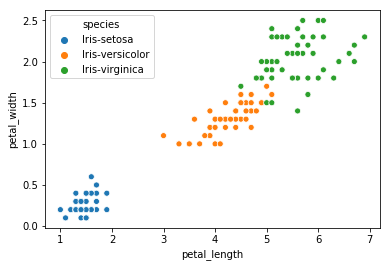

In [22]:
sns.scatterplot(x="petal_length", y="petal_width", hue="species",
                     data=df)

<div class="alert alert-info" role="info">
  Opdracht 10. Schrijf je bevindingen op.
</div>

In [23]:
## Uitwerkingen opdracht 10...